## <center>freeCodeCamp (🔥) - Data Analysis with Python</center>

### Project 3 - Medical Data Visualizer [🔗](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer)

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

#### Data description

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

File name: medical_examination.csv

|Feature |Variable |Type |Variable |Value Type |
|--------|---------|-----|---------|---------- |
|Age |Objective |Feature |age |int (days) |
|Height |Objective |Feature |height |int (cm) |
|Weight |Objective |Feature |weight |float (kg) |
|Gender |Objective |Feature |gender |categorical code |
|Systolic blood pressure |Examination |Feature |ap_hi |int |
|Diastolic blood pressure |Examination |Feature |ap_lo |int |
|Cholesterol |Examination |Feature 	|cholesterol |1: normal, 2: above normal, 3: well above normal|
|Glucose |Examination |Feature |gluc |1: normal, 2: above normal, 3: well above normal|
|Smoking |Subjective |Feature |smoke |binary |
|Alcohol intake |Subjective |Feature |alco 	|binary |
|Physical activity |Subjective |Feature |active |binary |
|Presence or absence of cardiovascular disease |Target |Variable |cardio |binary |


#### Tasks

Create a chart similar to <mark>examples/Figure_1.png</mark>, where we show the counts of good and bad outcomes for the <mark>cholesterol</mark>, <mark>gluc</mark>, <mark>alco</mark>, <mark>active</mark>, and <mark>smoke</mark> variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in <mark>medical_data_visualizer.py</mark>:

- Add an <mark>overweight</mark> column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
    
- Normalize the data by making 0 always good and 1 always bad. If the value of <mark>cholesterol</mark> or <mark>gluc</mark> is 1, make the value 0. If the value is more than 1, make the value 1.
    
- Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's <mark>catplot()</mark>. The dataset should be split by 'Cardio' so there is one chart for each <mark>cardio value. The chart should look like <mark>examples/Figure_1.png</mark>.
    
- Clean the data. Filter out the following patient segments that represent incorrect data:
 - diastolic pressure is higher than systolic (Keep the correct data with <mark>(df['ap_lo'] <= df['ap_hi'])</mark>)
 - height is less than the 2.5th percentile (Keep the correct data with <mark>(df['height'] >= df['height'].quantile(0.025))</mark>)
 - height is more than the 97.5th percentile
 - weight is less than the 2.5th percentile
 - weight is more than the 97.5th percentile
        
- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's <mark>heatmap()</mark>. Mask the upper triangle. The chart should look like <mark>examples/Figure_2.png</mark>.

### Now, let's code!

In [1]:
#The libraries we are using for this project are: matplotlib, seaborn, pandas and numpy.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# We load the dataset using read_csv
#https://github.com/freeCodeCamp/boilerplate-medical-data-visualizer/blob/master/medical_examination.csv
df=pd.read_csv("medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Add overweight column. We'll define overweight as BMI above 25.

BMI = df['weight']/(df['height']/100)**2 #By dividing height / 100, we go from cm to meters and can correctly calculate BMI

df['overweight'] = BMI>25 #This will return boolean values
df['overweight'] = df['overweight'].astype(int) #It's better to work with integrers

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [4]:
#Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

df[['cholesterol', 'gluc']] = df[['cholesterol', 'gluc']] > 1 #We get boolean values
df[['cholesterol', 'gluc']] = df[['cholesterol', 'gluc']].astype(int) #It's better to work with integrers

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [5]:
#Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
df_cat = df_cat.value_counts().reset_index(name='total').sort_values(by='variable')

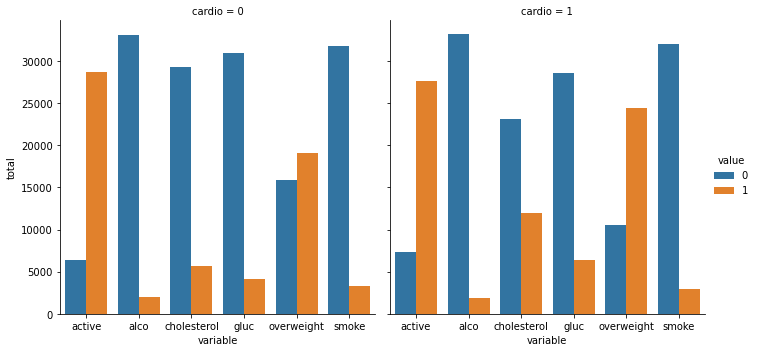

In [6]:
sns.catplot(data=df_cat,
            x = 'variable',
            y = 'total',
            kind ='bar',
            hue = 'value',
            col='cardio')

In [7]:
#Clean the data. Filter out the following patient segments that represent incorrect data: 

df_heat = df[(df['ap_lo']<=df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025))&
    (df['height'] <= df['height'].quantile(0.975))&
    (df['weight'] >= df['weight'].quantile(0.025))&
    (df['weight'] <= df['weight'].quantile(0.975))
    ]

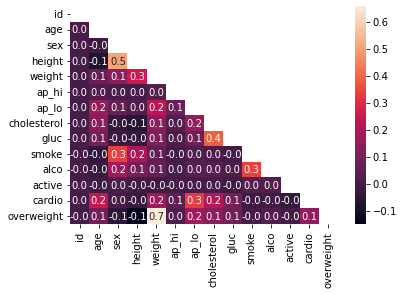

In [8]:
#Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like 
sns.heatmap(df_heat.corr(), annot=True, mask=np.triu(df_heat.corr()), fmt='.1f')
plt.show()

### That's all! If you did it in a different way, please feel free to share